# Simple Regression
Goal: Predicting Matathon Running Time from Age

In [51]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
# Load the dataset
df = pd.read_csv('input/marathon.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1391 entries, 0 to 1390
Data columns (total 11 columns):
Rank                  1391 non-null int64
Bib                   1391 non-null int64
LastName              1391 non-null object
FirstName             1391 non-null object
Team                  1391 non-null object
Nationality           1391 non-null object
Category              1391 non-null object
PositionInCategory    1391 non-null int64
PositionInGenre       1391 non-null int64
OfficialTime          1391 non-null object
Delay                 1391 non-null object
dtypes: int64(4), object(7)
memory usage: 119.6+ KB


In [53]:
# Analyzing dataset structure


In [54]:
# Sample

# Preprocessing
Create more interesting variables

In [55]:
def Genre(category):
    '''Computes the genre from the FIDAL running category
    http://www.fidal.it/content/Le-categorie-di-tesseramento-atleti/49913
    '''
   

In [56]:
def Age(category):
    '''Computes the age from the FIDAL running category
    http://www.fidal.it/content/Le-categorie-di-tesseramento-atleti/49913
    '''


In [57]:
def MaxAge(category):
    '''Computes the upper bound to runner's age from the FIDAL running category
    http://www.fidal.it/content/Le-categorie-di-tesseramento-atleti/49913
    '''


In [58]:
def ConvertTimeToSeconds(time_string):
    '''Computes the running time from hh:mm:ss format'''


In [59]:
def ConvertDelay(dt):
    '''Computes the delay from the first runner time from +hh:mm:ss format'''
    return ConvertTimeToSeconds(str(dt)[1:])

In [60]:
def PreprocessRunnersStats(df, distance=42.198):
    cdf = df
    cdf['Age'] = cdf['Category'].apply(Age)
    cdf['MaxAge'] = cdf['Category'].apply(MaxAge)
    cdf['Genre'] = cdf['Category'].apply(Genre)
    cdf['TimeInSeconds'] = cdf['OfficialTime'].apply(ConvertTimeToSeconds)
    cdf['TimeInHours'] = cdf['TimeInSeconds']/3600.0
    cdf['MinutesPerKm'] = (cdf['TimeInSeconds']/60.0)/distance
    cdf['DelayInSeconds'] = cdf['Delay'].apply(ConvertDelay)
    return cdf

In [61]:
# Apply 


First, we plot the raw data to get an idea of what we are dealing with.

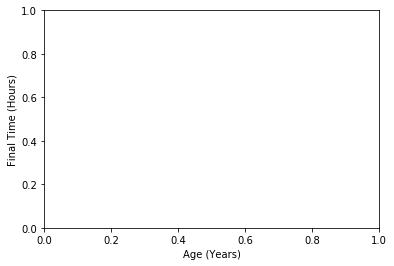

In [62]:
# Plot
plt.xlabel("Age (Years)")
plt.ylabel("Final Time (Hours)")


The points are aligned based on age groups for instance, all the data for runners between 35 and 39 appears on the same line since the marathon registration cluster runners in such classes. More information about the age categories are available at, http://www.fidal.it/content/Le-categorie-di-tesseramento-atleti/49913

These points cannot be used for ordinary least square linear regression since of the same input x we have multiple outputs. So for the very first analysis we compute the average running time and try to build a model that predicts that value. For this purpose, we use a function that given the data computes several statistics.

In [63]:
def ComputeStats(df, target):

    age = []
    q1 = []
    q2 = []
    q3 = []
    avg = []
    stddev = []
    stderr = []

    unique_age = sorted(df['Age'].unique())

    for a in unique_age:
        # selected data
        sd = np.array(df[df['Age']==a][target])

        age.append(a)
        q1.append(np.percentile(sd,25))
        q2.append(np.percentile(sd, 50))
        q3.append(np.percentile(sd, 75))
        avg.append(np.average(sd))
        stddev.append(np.std(sd))
        stderr.append(np.std(sd)/len(sd))
        
    return pd.DataFrame({'Age':age, 'FirstQuartile':q1, 'SecondQuartile':q2, 'ThirdQuartile':q3, 'Average':avg, 'StdDev':stddev, 'StdErr':stderr})


In [64]:
# Apply ComputeStats


Let's plot the average running time.

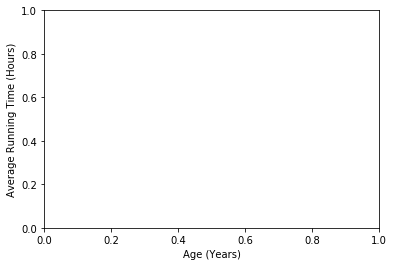

In [65]:
# Plot average time
plt.xlabel("Age (Years)")
plt.ylabel("Average Running Time (Hours)")


## Enriching Data with Domain Knowledge
We know that the age categories group together people of different ages. For example, SM_35 is associated to males between the are of 35 and 40 excluded. Thus, the data we plotted at the beginning are not a correct representation of our data. We can insert what we know about the age groups to the training data. We modify the age of individuals by randomly generating an age from the corresponding interval. For instance, we substitute an age of 35 with a random age selected between 35 and 40 (excluded).

In [66]:
import random 

def JitterAge(age):
    if (age>=35):
        return age + random.uniform(0,5)
    if (age==20):
        return age + random.uniform(0,2)
    if (age==23):
        return age + random.uniform(0,12)
    
# Apply to age

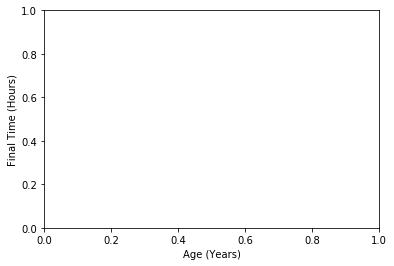

In [67]:
# Plot
plt.xlabel("Age (Years)")
plt.ylabel("Final Time (Hours)")

